# Open a WSI file

We will learn how to open a WSI file, read its metadata and inspect its content.

In [1]:
from wsidata import open_wsi

You can either open a local or a remote WSI file. If you open a remote file, the file will be downloaded to your working directory by default and cached for future use.

In [2]:
URL = "https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1-Small-Region.svs"

wsi = open_wsi(URL)

Here we also showcase how to cache the file in a specific directory with a specific name.

```python
wsi = open_wsi(URL, cache_dir="data", name="sample.svs")
```

In [3]:
wsi

WSI: CMU-1-Small-Region.svs
Reader: openslide
SpatialData object
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1496, 1119)
└── Tables
      └── 'slide_properties': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)

If we inspect the WSIData object, we can see that it contains several information.
The first line shows you the disk path to your WSI file. The reader tells you which reader was used to open the file. The rest are output from SpatialData object, which we used to record the relevant analysis results of the WSI file.

# WSI Properties

The properties of the WSI file can be accessed through the properties attribute.

In [4]:
wsi.properties

Field,Value
shape,"[2967, 2220]"
n_level,1
level_shape,"[[2967, 2220]]"
level_downsample,[1.0]
mpp,0.499
magnification,20.0
bounds,"[0, 0, 2967, 2220]"


# What does the WSI looks like?

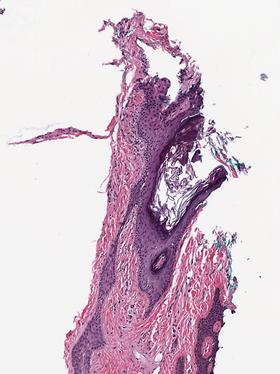

In [5]:
wsi.thumbnail

# Access the WSI region

You can access a region of the WSI file by specifying the x-y coordination and the size of the region. Here we access a region of size 250x210 at (1000, 1000) at level 0.

In [6]:
# This will return a numpy array in uint8 format
region = wsi.read_region(1000, 1000, 210, 250, level=0)

Let's visualize the region.

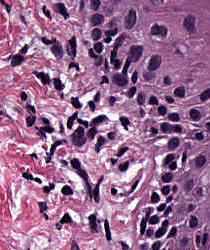

In [7]:
from PIL import Image

Image.fromarray(region)

# Save the wsidata on disk

The WSIData object is inherited from SpatialData object. You can save it on disk as a zarr file. However, you don't need to specify the path, by default, it will be saved in the same directory as the WSI file.

In [8]:
wsi.wsi_store

PosixPath('CMU-1-Small-Region.zarr')

Here, the zarr storage will have the same name as the slide file

In [9]:
# To save it on disk
wsi.write()
# To save it on disk with a specific name
# wsi.write("data/sample.zarr")

INFO     The Zarr backing store has been changed from None the new file path: CMU-1-Small-Region.zarr              
